In [182]:
import yfinance as yf
import pandas as pd
import numpy as np

In [184]:
vix_df=yf.download('^VIX')
vix_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-01-02,17.240000,17.240000,17.240000,17.240000,17.240000,0
1990-01-03,18.190001,18.190001,18.190001,18.190001,18.190001,0
1990-01-04,19.219999,19.219999,19.219999,19.219999,19.219999,0
1990-01-05,20.110001,20.110001,20.110001,20.110001,20.110001,0
1990-01-08,20.260000,20.260000,20.260000,20.260000,20.260000,0
...,...,...,...,...,...,...
2023-01-18,19.280001,20.580000,18.709999,20.340000,20.340000,0
2023-01-19,20.430000,21.709999,20.170000,20.520000,20.520000,0
2023-01-20,20.280001,20.700001,19.410000,19.850000,19.850000,0


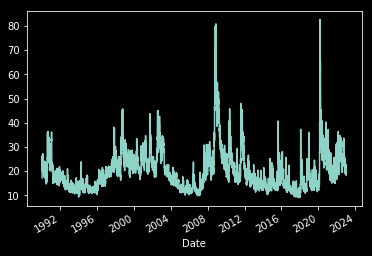

In [226]:
vix_df.Close.plot()

In [185]:
vix_df['MA']=vix_df.Close.rolling('30D').mean()
vix_df

,Open,High,Low,Close,Adj Close,Volume,MA
Date,,,,,,,
1990-01-02,17.240000,17.240000,17.240000,17.240000,17.240000,0,17.240000
1990-01-03,18.190001,18.190001,18.190001,18.190001,18.190001,0,17.715000
1990-01-04,19.219999,19.219999,19.219999,19.219999,19.219999,0,18.216667
1990-01-05,20.110001,20.110001,20.110001,20.110001,20.110001,0,18.690000
1990-01-08,20.260000,20.260000,20.260000,20.260000,20.260000,0,19.004000
...,...,...,...,...,...,...,...
2023-01-18,19.280001,20.580000,18.709999,20.340000,20.340000,0,21.068947
2023-01-19,20.430000,21.709999,20.170000,20.520000,20.520000,0,21.018421
2023-01-20,20.280001,20.700001,19.410000,19.850000,19.850000,0,21.006842


In [186]:
vix_df_filt=vix_df[vix_df.Close>1.5*vix_df.MA]
vix_df_filt

,Open,High,Low,Close,Adj Close,Volume,MA
Date,,,,,,,
1990-08-06,35.910000,35.910000,35.910000,35.910000,35.910000,0,20.330476
1990-08-07,32.750000,32.750000,32.750000,32.750000,32.750000,0,20.895000
1994-04-04,23.610001,28.299999,23.610001,23.870001,23.870001,0,15.487000
1997-10-30,36.709999,38.560001,35.840000,38.200001,38.200001,0,23.360909
2001-09-17,43.200001,44.330002,39.770000,41.759998,41.759998,0,25.810625
...,...,...,...,...,...,...,...
2020-03-19,80.620003,84.260002,68.570000,72.000000,72.000000,0,44.842273
2021-01-27,23.820000,37.209999,23.709999,37.209999,37.209999,0,23.929500
2021-11-26,26.620001,28.990000,23.879999,28.620001,28.620001,0,17.673810


In [195]:
series=pd.Series(vix_df_filt.index).diff()/ np.timedelta64(1,'D')>=30
series

0     False
1     False
2      True
3      True
4      True
      ...  
60    False
61     True
62     True
63    False
64     True
Name: Date, Length: 65, dtype: bool

In [196]:
series[0]=True

In [198]:
signals=vix_df_filt[series.values]
signals

,Open,High,Low,Close,Adj Close,Volume,MA
Date,,,,,,,
1990-08-06,35.910000,35.910000,35.910000,35.910000,35.910000,0,20.330476
1994-04-04,23.610001,28.299999,23.610001,23.870001,23.870001,0,15.487000
1997-10-30,36.709999,38.560001,35.840000,38.200001,38.200001,0,23.360909
2001-09-17,43.200001,44.330002,39.770000,41.759998,41.759998,0,25.810625
2007-02-27,12.120000,19.010000,12.100000,18.309999,18.309999,0,10.921905
2008-09-17,31.959999,36.400002,30.250000,36.220001,36.220001,0,23.478095
2010-05-06,25.879999,40.709999,24.430000,32.799999,32.799999,0,18.951364
2011-08-04,24.570000,32.070000,24.309999,31.660000,31.660000,0,20.732273
2014-10-13,21.160000,24.639999,20.520000,24.639999,24.639999,0,15.625714


In [199]:
signals.shape

(21, 7)

In [200]:
sp_df=yf.download('^GSPC',start='1990-01-01')
sp_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,359.690002,162070000
1990-01-03,359.690002,360.589996,357.890015,358.760010,358.760010,192330000
1990-01-04,358.760010,358.760010,352.890015,355.670013,355.670013,177000000
1990-01-05,355.670013,355.670013,351.350006,352.200012,352.200012,158530000
1990-01-08,352.200012,354.239990,350.540009,353.790009,353.790009,140110000
...,...,...,...,...,...,...
2023-01-17,3999.280029,4015.389893,3984.570068,3990.969971,3990.969971,4235560000
2023-01-18,4002.250000,4014.159912,3926.590088,3928.860107,3928.860107,4298710000
2023-01-19,3911.840088,3922.939941,3885.540039,3898.850098,3898.850098,3991500000


In [202]:
test_=sp_df[sp_df.index>=signals.index[0]]


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-08-06,344.859985,344.859985,333.269989,334.429993,334.429993,240400000
1990-08-07,334.429993,338.630005,332.220001,334.829987,334.829987,231580000
1990-08-08,334.829987,339.209991,334.829987,338.350006,338.350006,190400000
1990-08-09,338.350006,340.559998,337.559998,339.940002,339.940002,155810000
1990-08-10,339.899994,339.899994,334.220001,335.519989,335.519989,145340000
...,...,...,...,...,...,...
2023-01-17,3999.280029,4015.389893,3984.570068,3990.969971,3990.969971,4235560000
2023-01-18,4002.250000,4014.159912,3926.590088,3928.860107,3928.860107,4298710000
2023-01-19,3911.840088,3922.939941,3885.540039,3898.850098,3898.850098,3991500000


In [211]:
from pandas.tseries.offsets import DateOffset
test_=sp_df[(sp_df.index>=signals.index[0])&
           (sp_df.index<=signals.index[0]+DateOffset(months=6))]
test_

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-08-06,344.859985,344.859985,333.269989,334.429993,334.429993,240400000
1990-08-07,334.429993,338.630005,332.220001,334.829987,334.829987,231580000
1990-08-08,334.829987,339.209991,334.829987,338.350006,338.350006,190400000
1990-08-09,338.350006,340.559998,337.559998,339.940002,339.940002,155810000
1990-08-10,339.899994,339.899994,334.220001,335.519989,335.519989,145340000
...,...,...,...,...,...,...
1991-01-31,340.920013,343.929993,340.470001,343.929993,343.929993,204520000
1991-02-01,343.910004,344.899994,340.369995,343.049988,343.049988,246670000
1991-02-04,343.049988,348.709991,342.959991,348.339996,348.339996,250750000


In [212]:
signals.index[0]+DateOffset(month=1)

Timestamp('1990-01-06 00:00:00')

In [213]:
test_

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-08-06,344.859985,344.859985,333.269989,334.429993,334.429993,240400000
1990-08-07,334.429993,338.630005,332.220001,334.829987,334.829987,231580000
1990-08-08,334.829987,339.209991,334.829987,338.350006,338.350006,190400000
1990-08-09,338.350006,340.559998,337.559998,339.940002,339.940002,155810000
1990-08-10,339.899994,339.899994,334.220001,335.519989,335.519989,145340000
...,...,...,...,...,...,...
1991-01-31,340.920013,343.929993,340.470001,343.929993,343.929993,204520000
1991-02-01,343.910004,344.899994,340.369995,343.049988,343.049988,246670000
1991-02-04,343.049988,348.709991,342.959991,348.339996,348.339996,250750000


In [216]:
(test_.Close.pct_change()+1).prod()

1.0706874836772058

In [217]:
returns=[]

In [218]:
for i in range(len(signals)):
    subdf=sp_df[(sp_df.index>=signals.index[i])&
                (sp_df.index<=signals.index[i]+DateOffset(months=6))]
    returns.append((subdf.Close.pct_change()+1).prod())

In [219]:
returns

[1.0706874836772058,
 1.0357012267173276,
 1.2302474426905545,
 1.122635436384584,
 1.0484260622343589,
 0.6728871619959027,
 1.086601913803633,
 1.1206846972319002,
 1.1161174043015076,
 1.0626286532638536,
 0.9730527908930336,
 1.1111116569983719,
 1.0743742707953239,
 1.0722591529003795,
 1.0368061054438837,
 1.2527540195300035,
 1.172230134512753,
 1.063669295468296,
 1.1734816952300284,
 0.8831720543579019,
 0.9105670695280556]

In [222]:
pd.Series(returns)-1

0     0.070687
1     0.035701
2     0.230247
3     0.122635
4     0.048426
5    -0.327113
6     0.086602
7     0.120685
8     0.116117
9     0.062629
10   -0.026947
11    0.111112
12    0.074374
13    0.072259
14    0.036806
15    0.252754
16    0.172230
17    0.063669
18    0.173482
19   -0.116828
20   -0.089433
dtype: float64

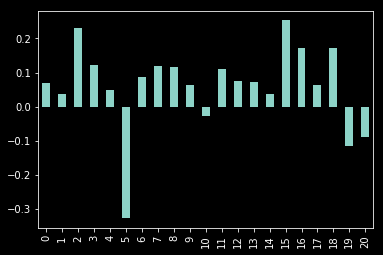

In [224]:
(pd.Series(returns)-1).plot(kind='bar')